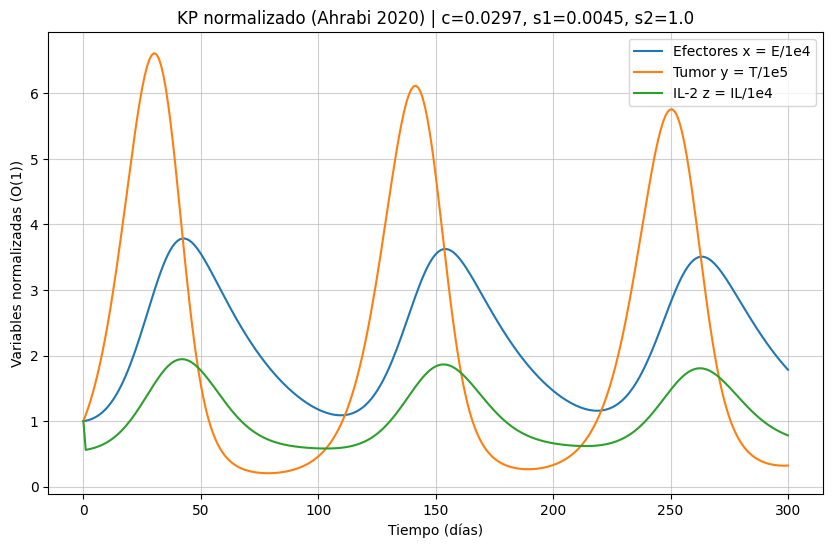

In [ ]:
# Importando las librerías necesarias
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.init as init

# Modelo Kirschner–Panetta NORMALIZADO (Ahrabi 2020) 
# Variables ya escaladas: x=E/1e4, y=T/1e5, z=IL/1e4
# ICs normalizadas: x(0)=y(0)=z(0)=1

# Parámetros 
p1  = 0.1245     
g1  = 2e3        
mu2 = 0.03       
r2  = 0.18      
b   = 1e-5       
a   = 1.0       
g2  = 1e1        
mu3 = 10.0       
p2  = 5.0        
g3  = 1e-1       
c   = 0.0297     

s1 = 45e-4       
s2 = 100000e-5     

def dP_dt(P, t):
    x, y, z = P
    dx = c*y - mu2*x + p1*x*z/(g1 + z) + s1
    dy = r2*y*(1 - b*y) - a*x*y/(g2 + y)
    dz = p2*x*y/(g3 + y) - mu3*z + s2
    return [dx, dy, dz]

t = np.linspace(0, 300, 300)
P0 = [1.0, 1.0, 1.0]   # modelo normalizado

datos_sol = odeint(dP_dt, P0, t)
x, y, z = datos_sol[:, 0], datos_sol[:, 1], datos_sol[:, 2]

plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Efectores x = E/1e4")
plt.plot(t, y, label="Tumor y = T/1e5")
plt.plot(t, z, label="IL-2 z = IL/1e4")
plt.title(f"KP normalizado (Ahrabi 2020) | c={c}, s1={s1}, s2={s2}")
plt.xlabel("Tiempo (días)")
plt.ylabel("Variables normalizadas (O(1))")
plt.legend(loc="upper right")
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

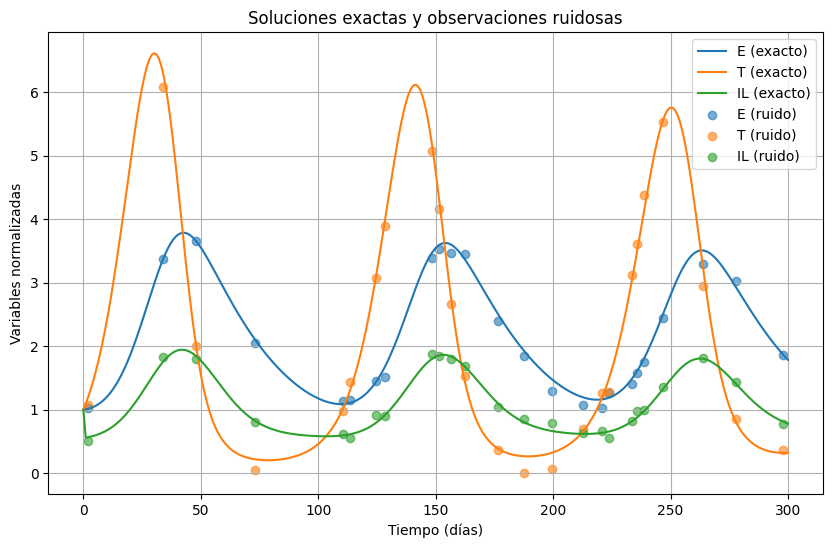

In [ ]:
# Convertimos  a tensores ---
t_values  = torch.tensor(t, dtype=torch.float32).view(-1, 1)
E_values  = torch.tensor(x, dtype=torch.float32).view(-1, 1)
T_values  = torch.tensor(y, dtype=torch.float32).view(-1, 1)
IL_values = torch.tensor(z, dtype=torch.float32).view(-1, 1)

# Datos observacionales ruidosos 
torch.manual_seed(40)  
n_obs = 25  

N = t_values.shape[0]
idx_obs = torch.randperm(N)[:n_obs]  
idx_obs, _ = torch.sort(idx_obs)    

t_obs = t_values[idx_obs]
E_obs, T_obs, IL_obs = E_values[idx_obs], T_values[idx_obs], IL_values[idx_obs]

# Ruido gaussiano 5% 
sigma_E  = 0.05 * E_obs.mean()
sigma_T  = 0.05 * T_obs.mean()
sigma_IL = 0.05 * IL_obs.mean()

E_obs_r  = torch.clamp(E_obs  + sigma_E  * torch.randn_like(E_obs),  min=0.0)
T_obs_r  = torch.clamp(T_obs  + sigma_T  * torch.randn_like(T_obs),  min=0.0)
IL_obs_r = torch.clamp(IL_obs + sigma_IL * torch.randn_like(IL_obs), min=0.0)

# Visualización 
plt.figure(figsize=(10, 6))
plt.plot(t_values, E_values, label='E (exacto)')
plt.plot(t_values, T_values, label='T (exacto)')
plt.plot(t_values, IL_values, label='IL (exacto)')

plt.scatter(t_obs, E_obs_r,  label="E (ruido)",  alpha=0.6)
plt.scatter(t_obs, T_obs_r,  label="T (ruido)",  alpha=0.6)
plt.scatter(t_obs, IL_obs_r, label="IL (ruido)", alpha=0.6)

plt.xlabel('Tiempo (días)')
plt.ylabel('Variables normalizadas')
plt.title("Soluciones exactas y observaciones ruidosas")
plt.legend()
plt.grid()
plt.show()


Iter 0 | Loss=10.429916 | Phys=28.104704 | Obs=7.619446 | c=0.810243 | a=0.822227


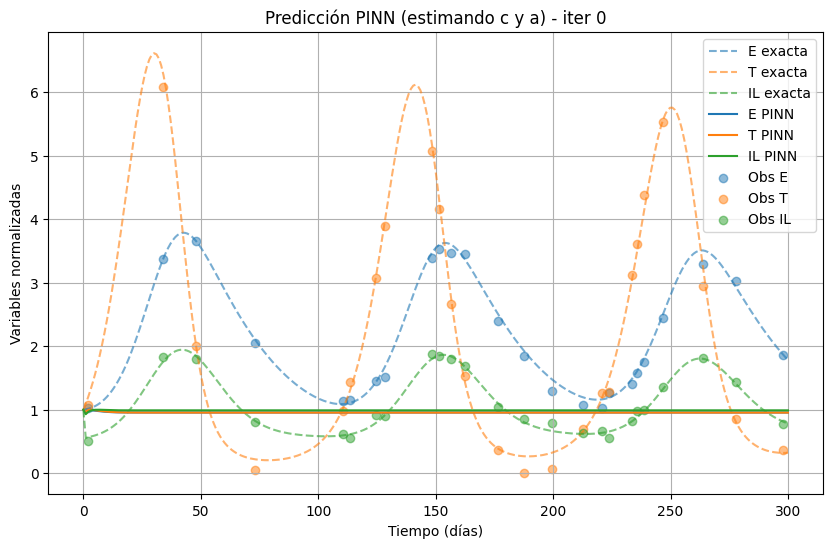

Iter 2000 | Loss=3.647460 | Phys=0.396914 | Obs=3.607769 | c=0.254400 | a=0.925896
Iter 4000 | Loss=3.031540 | Phys=0.114892 | Obs=3.020051 | c=0.135313 | a=0.880177
Iter 6000 | Loss=0.261719 | Phys=0.185829 | Obs=0.243136 | c=0.080811 | a=0.912442
Iter 8000 | Loss=0.031716 | Phys=0.031965 | Obs=0.028520 | c=0.054627 | a=0.975051
Iter 10000 | Loss=0.030296 | Phys=0.019275 | Obs=0.028369 | c=0.041086 | a=0.988517


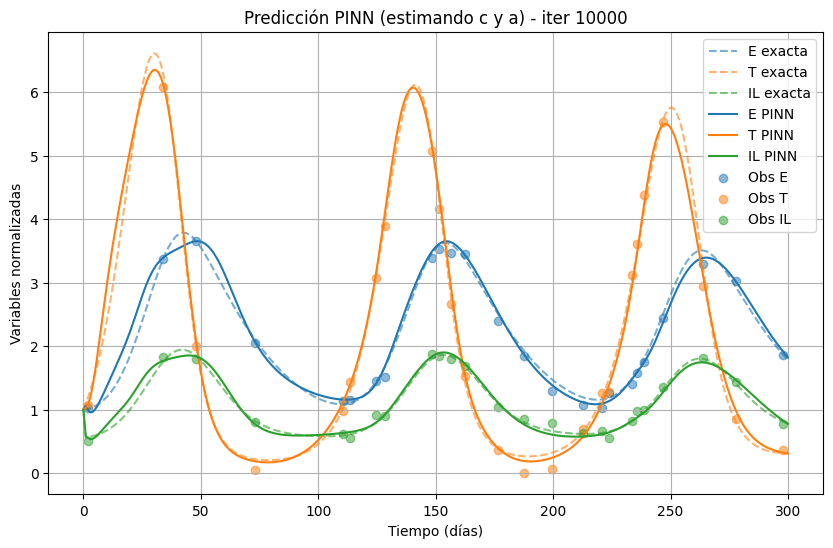

Iter 12000 | Loss=0.018899 | Phys=0.014795 | Obs=0.017420 | c=0.036080 | a=0.997705
Iter 14000 | Loss=0.016715 | Phys=0.013618 | Obs=0.015353 | c=0.035703 | a=1.001478
Iter 16000 | Loss=0.029873 | Phys=0.016268 | Obs=0.028247 | c=0.035786 | a=1.004258
Iter 18000 | Loss=0.020738 | Phys=0.011142 | Obs=0.019624 | c=0.035733 | a=1.006884
Iter 20000 | Loss=0.015251 | Phys=0.011852 | Obs=0.014066 | c=0.035687 | a=1.007660


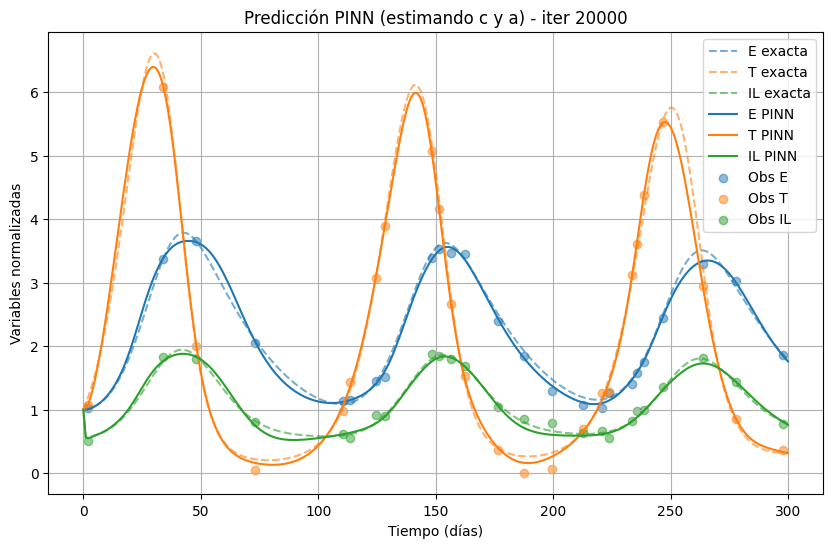

Iter 22000 | Loss=0.033761 | Phys=0.013872 | Obs=0.032374 | c=0.035656 | a=1.006996
Iter 24000 | Loss=0.019568 | Phys=0.011635 | Obs=0.018404 | c=0.035629 | a=1.005694
Iter 26000 | Loss=0.021399 | Phys=0.011673 | Obs=0.020232 | c=0.035645 | a=1.005605
Iter 28000 | Loss=0.016601 | Phys=0.011803 | Obs=0.015421 | c=0.035696 | a=1.005453
Iter 30000 | Loss=0.015799 | Phys=0.016014 | Obs=0.014197 | c=0.035736 | a=1.005285


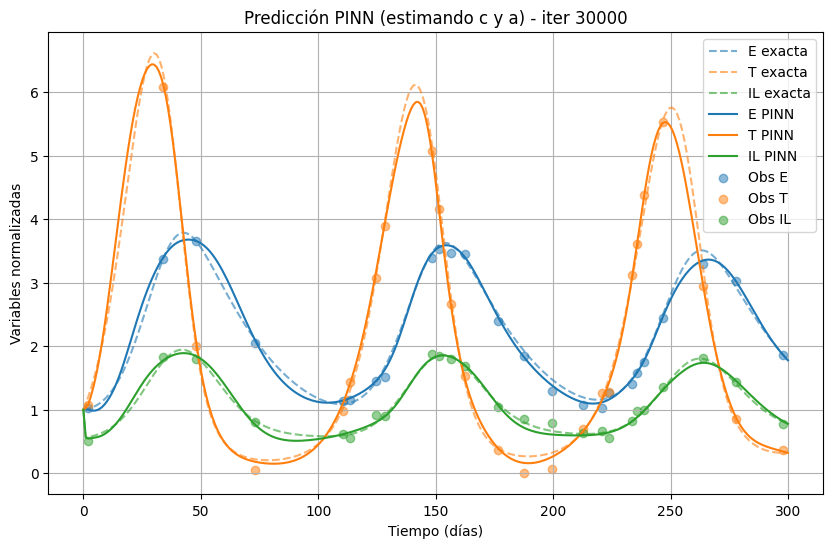

Iter 32000 | Loss=0.040477 | Phys=0.011386 | Obs=0.039338 | c=0.035668 | a=1.005041
Iter 34000 | Loss=0.015562 | Phys=0.009761 | Obs=0.014586 | c=0.035645 | a=1.004240
Iter 36000 | Loss=0.013965 | Phys=0.011132 | Obs=0.012852 | c=0.035675 | a=1.005405
Iter 38000 | Loss=0.039298 | Phys=0.014102 | Obs=0.037888 | c=0.035673 | a=1.005276
Iter 40000 | Loss=0.016577 | Phys=0.014474 | Obs=0.015129 | c=0.035651 | a=1.005417


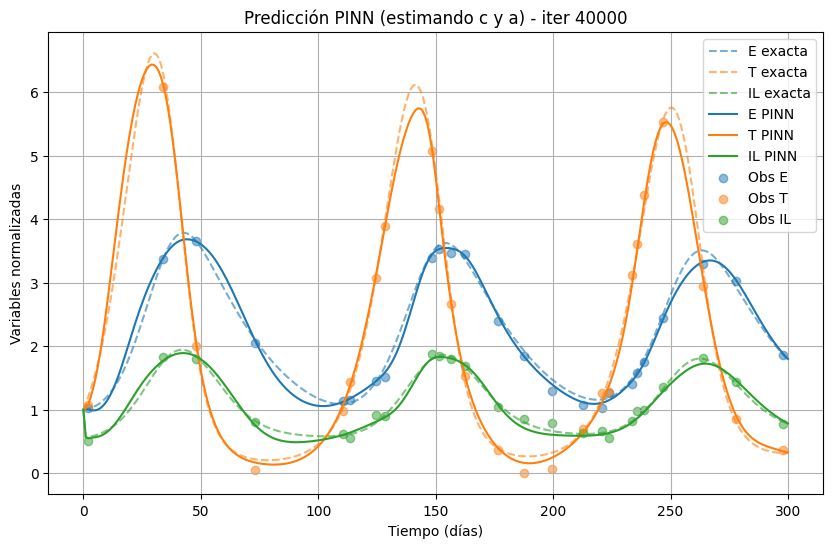

Iter 42000 | Loss=0.020959 | Phys=0.018789 | Obs=0.019080 | c=0.035636 | a=1.006054
Iter 44000 | Loss=0.014478 | Phys=0.012218 | Obs=0.013256 | c=0.035602 | a=1.005848
Iter 46000 | Loss=0.013794 | Phys=0.014989 | Obs=0.012295 | c=0.035586 | a=1.005995
Iter 48000 | Loss=0.014761 | Phys=0.015616 | Obs=0.013200 | c=0.035656 | a=1.007563
Iter 50000 | Loss=0.012775 | Phys=0.010756 | Obs=0.011699 | c=0.035595 | a=1.006889


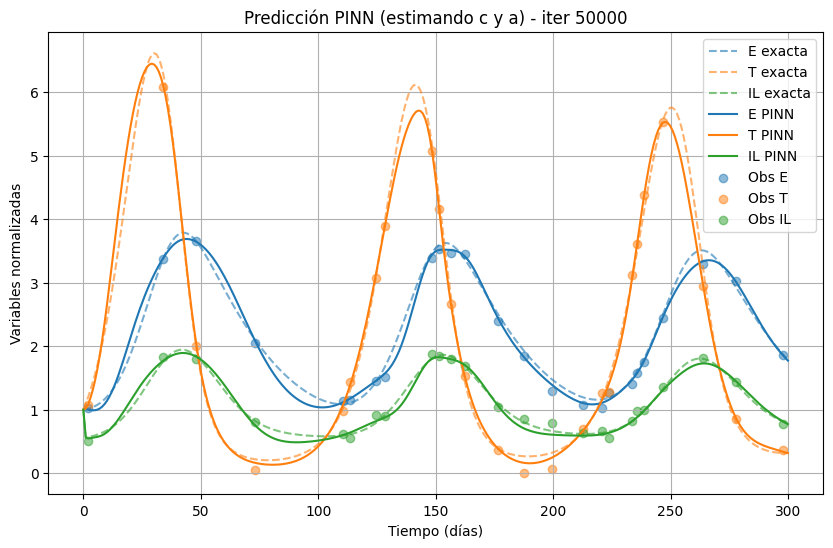

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# FCNN con ansatz 
class FCN_Ansatz(nn.Module):
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS,
                 E0, T0, IL0):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(nn.Linear(N_INPUT, N_HIDDEN), activation())
        self.fch = nn.Sequential(*[
            nn.Sequential(nn.Linear(N_HIDDEN, N_HIDDEN), activation())
            for _ in range(N_LAYERS - 1)
        ])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)

        # condiciones iniciales
        self.register_buffer("E0", torch.tensor([[E0]], dtype=torch.float32))
        self.register_buffer("T0", torch.tensor([[T0]], dtype=torch.float32))
        self.register_buffer("IL0", torch.tensor([[IL0]], dtype=torch.float32))

    def forward(self, t):
        N = self.fce(self.fch(self.fcs(t)))
        mask = (1 - torch.exp(-5*t))  # ansatz
        E_hat  = self.E0  + mask * N[:,0:1]
        T_hat  = self.T0  + mask * N[:,1:2]
        IL_hat = self.IL0 + mask * N[:,2:3]
        return torch.cat([E_hat, T_hat, IL_hat], dim=1)

# Configuración GPU 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Inicialización de la red 
PINN = FCN_Ansatz(1, 3, 32, 3, E0=1.0, T0=1.0, IL0=1.0).to(device)

t_f = 300
t_physics = torch.tensor((np.polynomial.legendre.leggauss(150)[0] + 1) / 2 * t_f,
                         dtype=torch.float32, device=device).reshape(-1, 1).requires_grad_(True)
t_test = torch.linspace(0, t_f, 300, device=device).view(-1, 1)

# Parámetros fijos
p1_t  = torch.tensor(p1, dtype=torch.float32, device=device)
g1_t  = torch.tensor(g1, dtype=torch.float32, device=device)
mu2_t = torch.tensor(mu2, dtype=torch.float32, device=device)
b_t   = torch.tensor(b,  dtype=torch.float32, device=device)
g2_t  = torch.tensor(g2, dtype=torch.float32, device=device)
mu3_t = torch.tensor(mu3, dtype=torch.float32, device=device)
p2_t  = torch.tensor(p2, dtype=torch.float32, device=device)
g3_t  = torch.tensor(g3, dtype=torch.float32, device=device)
s1_t  = torch.tensor(s1, dtype=torch.float32, device=device)
s2_t  = torch.tensor(s2, dtype=torch.float32, device=device)
r2_t  = torch.tensor(r2, dtype=torch.float32, device=device)

# Parámetros a estimar
c_t = nn.Parameter(torch.rand(1, device=device))
a_t = nn.Parameter(torch.rand(1, device=device))

# Optimizador 
optimiser = torch.optim.Adam(
    list(PINN.parameters()) + [c_t, a_t],
    lr=1e-3, weight_decay=1e-4
)

loss_total_list, loss_phys_list, loss_obs_list = [], [], []
c_list, a_list = [], []

for i in range(50001):
    optimiser.zero_grad()

    # Físicas 
    u, v, w = PINN(t_physics).split(1, dim=1)

    # Derivadas
    dudt = torch.autograd.grad(u, t_physics, torch.ones_like(u), create_graph=True)[0]
    dvdt = torch.autograd.grad(v, t_physics, torch.ones_like(v), create_graph=True)[0]
    dwdt = torch.autograd.grad(w, t_physics, torch.ones_like(w), create_graph=True)[0]

    # RHS 
    c_eff = torch.nn.functional.softplus(c_t)
    a_eff = torch.nn.functional.softplus(a_t)

    rhs_E  = c_eff*v - mu2_t*u + (p1_t*u*w)/(g1_t + w) + s1_t
    rhs_T  = r2_t*v*(1 - b_t*v) - a_eff*u*v/(g2_t + v)
    rhs_IL = (p2_t*u*v)/(g3_t + v) - mu3_t*w + s2_t

    # Pérdida física
    loss_phys = ((dudt - rhs_E)**2).mean() \
              + ((dvdt - rhs_T)**2).mean() \
              + ((dwdt - rhs_IL)**2).mean()

    # Pérdida observacional
    u_obs_pred, v_obs_pred, w_obs_pred = PINN(t_obs).split(1, dim=1)
    loss_obs = ((u_obs_pred - E_obs_r)**2).mean() \
             + ((v_obs_pred - T_obs_r)**2).mean() \
             + ((w_obs_pred - IL_obs_r)**2).mean()

    loss = 0.1*loss_phys + loss_obs
    loss.backward()
    optimiser.step()
    c_list.append(c_eff.item())
    a_list.append(a_eff.item())

    loss_total_list.append(loss.item())
    loss_phys_list.append(loss_phys.item())
    loss_obs_list.append(loss_obs.item())

    if i % 2000 == 0:
        print(f"Iter {i} | Loss={loss.item():.6f} | "
              f"Phys={loss_phys.item():.6f} | Obs={loss_obs.item():.6f} | "
              f"c={c_eff.item():.6f} | a={a_eff.item():.6f}")

    if i % 10000 == 0:
        with torch.no_grad():
            u_pred, v_pred, w_pred = PINN(t_test).split(1, dim=1)

            plt.figure(figsize=(10,6))
            # Exactas
            plt.plot(t_values.cpu(), E_values.cpu(), '--', color='tab:blue', alpha=0.6, label="E exacta")
            plt.plot(t_values.cpu(), T_values.cpu(), '--', color='tab:orange', alpha=0.6, label="T exacta")
            plt.plot(t_values.cpu(), IL_values.cpu(), '--', color='tab:green', alpha=0.6, label="IL exacta")
            # PINN
            plt.plot(t_test.cpu(), u_pred.cpu(), color='tab:blue', label="E PINN")
            plt.plot(t_test.cpu(), v_pred.cpu(), color='tab:orange', label="T PINN")
            plt.plot(t_test.cpu(), w_pred.cpu(), color='tab:green', label="IL PINN")
            # Observaciones
            plt.scatter(t_obs.cpu(), E_obs_r.cpu(), color='tab:blue', alpha=0.5, label="Obs E")
            plt.scatter(t_obs.cpu(), T_obs_r.cpu(), color='tab:orange', alpha=0.5, label="Obs T")
            plt.scatter(t_obs.cpu(), IL_obs_r.cpu(), color='tab:green', alpha=0.5, label="Obs IL")
            plt.title(f"Predicción PINN (estimando c y a) - iter {i}")
            plt.xlabel("Tiempo (días)")
            plt.ylabel("Variables normalizadas")
            plt.legend()
            plt.grid(True)
            plt.show()


In [ ]:
import pandas as pd

data = {
    'Parámetro': ['c', 'a'],
    'Valor real': [c, a],  
    'Valor estimado': [c_eff.item(), a_eff.item()]
}

df = pd.DataFrame(data)

# Error porcentual
df["Error (%)"] = 100.0 * abs(df["Valor estimado"] - df["Valor real"]) / df["Valor real"]

pd.options.display.float_format = '{:,.6f}'.format
display(df.style.hide(axis="index").set_properties(**{'text-align': 'center'}))


Parámetro,Valor real,Valor estimado,Error (%)
c,0.029700,0.035595,19.847318
a,1.000000,1.006889,0.688922


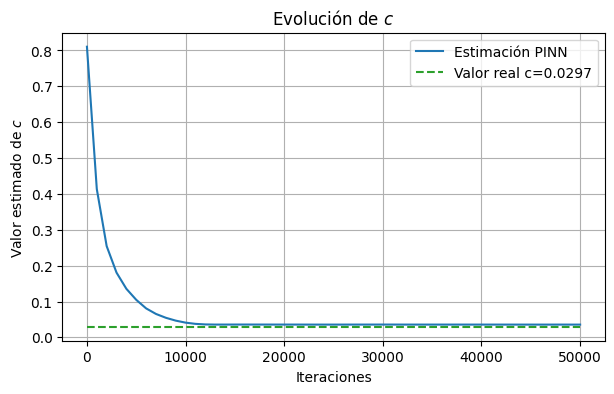

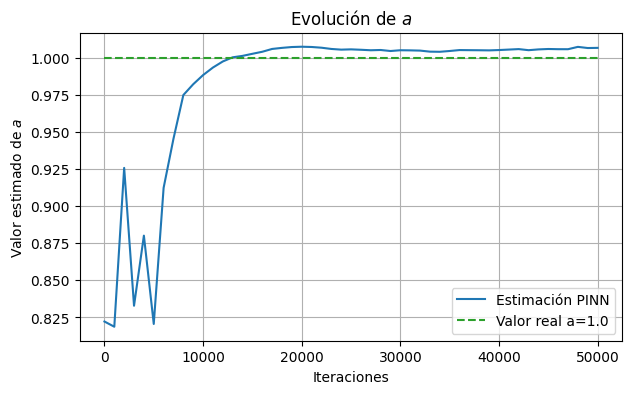

In [116]:
# Iteraciones
pasos = np.arange(len(c_list))
pasos_filtrados = pasos[::1000]

c_filtrados  = [c_list[i] for i in pasos_filtrados]
a_filtrados = [a_list[i] for i in pasos_filtrados]

# Curva de c
plt.figure(figsize=(7,4))
plt.plot(pasos_filtrados, c_filtrados, label="Estimación PINN", color="tab:blue")
plt.hlines(c, pasos_filtrados[0], pasos_filtrados[-1],
           label=f"Valor real c={c}", color="tab:green", linestyles="--")
plt.title(r"Evolución de $c$")
plt.xlabel("Iteraciones")
plt.ylabel(r"Valor estimado de $c$")
plt.legend()
plt.grid(True)
plt.show()

# Curva de r2
plt.figure(figsize=(7,4))
plt.plot(pasos_filtrados, a_filtrados, label="Estimación PINN", color="tab:blue")
plt.hlines(a, pasos_filtrados[0], pasos_filtrados[-1],
           label=f"Valor real a={a}", color="tab:green", linestyles="--")
plt.title(r"Evolución de $a$")
plt.xlabel("Iteraciones")
plt.ylabel(r"Valor estimado de $a$")
plt.legend()
plt.grid(True)
plt.show()


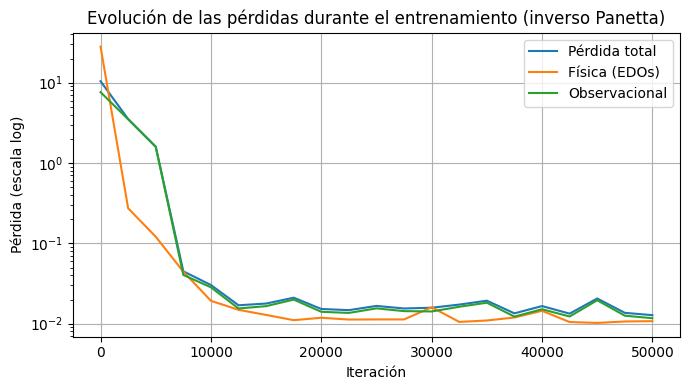

In [ ]:
# Índices de iteración 
iters = list(range(0, len(loss_total_list), 2500))

# Submuestreo 
loss_total_sub = loss_total_list[::2500]
loss_phys_sub  = loss_phys_list[::2500]
loss_obs_sub   = loss_obs_list[::2500]

# Gráfica de pérdidas
plt.figure(figsize=(7, 4))
plt.plot(iters, loss_total_sub, label='Pérdida total')
plt.plot(iters, loss_phys_sub,  label='Física (EDOs)')
plt.plot(iters, loss_obs_sub,   label='Observacional')
plt.yscale('log')
plt.xlabel('Iteración')
plt.ylabel('Pérdida (escala log)')
plt.title('Evolución de las pérdidas durante el entrenamiento (inverso Panetta)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()